# <올리스트 데이터 분석 전처리 - APPRU / Retention / R_ratio >

dataset 병합
예상되는 분석내용
- APPRU
- 재판매율(리텐션) 분석
- 잔존율 (retention ratio) 분석

## 라이브러리 로드

In [1]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 분석에 사용할 라이브러리를 불러옵니다
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## 폰트 로드

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

## 데이터로드

In [4]:
import glob

In [5]:
path = glob.glob('data/*.csv')
path

['data\\olist_customers_dataset.csv',
 'data\\olist_geolocation_dataset.csv',
 'data\\olist_orders_dataset.csv',
 'data\\olist_order_items_dataset.csv',
 'data\\olist_order_payments_dataset.csv',
 'data\\olist_order_reviews_dataset.csv',
 'data\\olist_products_dataset.csv',
 'data\\olist_sellers_dataset.csv',
 'data\\product_category_name_translation.csv']

In [6]:
# 각각의 데이터셋 import 
df_customers = pd.read_csv(path[0])
df_geolocation = pd.read_csv(path[1])
df_orders = pd.read_csv(path[2])
df_items = pd.read_csv(path[3])
df_payments = pd.read_csv(path[4])
df_reviews = pd.read_csv(path[5])
df_products = pd.read_csv(path[6])
df_sellers = pd.read_csv(path[7])
df_category = pd.read_csv(path[8])

In [7]:
# 모든 행과 열 나오게 조정 
pd.options.display.max_columns = None
# pd.options.display.max_rows = None -> 모든 열 출력

In [8]:
# import 한 데이터를 merge 하기 
# merge 해주는 이유는 merge 함수는 두 데이터 프레임을 각 데이터에 존재하는 고유값(key) 기준으로 병합할 때 사용한다.
# pd.merge(df_left, df_right, how='inner', on=None)이 default 
# on=None은 두 데이터의 공통열이름(key값) 기준으로 innerjoin  한다는 의미임 
# how = 'outer' 옵션이 붙으면 key 값기준으로 합치되 어느 한쪽에라도 없는 데이터가 있는 경우 NAN 값이 지정된다. 

In [9]:
# 하단 두개의 데이터셋은 병합에서 제외. 일단 고객 분석이 먼저니까 
# df_geolocation = pd.read_csv(path[1])
# df_sellers = pd.read_csv(path[7])

In [10]:
df = df_orders.merge(df_items, on ='order_id', how = 'outer')
df = df.merge(df_products, on ='product_id', how ='outer')
df = df.merge(df_category, on ='product_category_name', how ='outer')
df = df.merge(df_sellers, on = 'seller_id', how = 'outer')

## 데이터 미리보기 및 요약

In [11]:
df.shape

(113425, 26)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   order_item_id                  112650 non-null  float64
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [13]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
4,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,2.0,be03d93320192443b8fa24c0ca6ead98,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-30 11:45:25,46.80,67.70,utilidades_domesticas,59.0,189.0,3.0,775.0,16.0,16.0,13.0,housewares,9350.0,maua,SP


In [14]:
df.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
113420,edcf1e1eeb52381be9388c90152be52d,ce2172509c4149d65212484eb761bc37,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,2018-08-24 13:06:25,2018-09-06 00:00:00,1.0,6bb18295cc019bf3b6dc7c773411d530,04ee0ec01589969663ba5967c0e0bdc0,2018-08-27 11:50:47,289.49,24.83,artes_e_artesanato,47.0,1002.0,3.0,1900.0,19.0,16.0,16.0,arts_and_craftmanship,95910.0,lajeado,RS
113421,2c12150c742ae2fa48bc703964c16c5f,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,2018-07-29 18:30:31,2018-07-30 14:54:00,2018-08-03 17:46:46,2018-08-16 00:00:00,1.0,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,artes_e_artesanato,53.0,923.0,5.0,1000.0,25.0,25.0,25.0,arts_and_craftmanship,17201.0,jau,SP
113422,9f7ba492c273ffac8f90a623b8eadd3b,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,2018-08-24 03:24:24,2018-08-24 15:14:00,2018-08-28 02:06:35,2018-09-03 00:00:00,1.0,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,artes_e_artesanato,29.0,654.0,3.0,200.0,16.0,6.0,16.0,arts_and_craftmanship,17201.0,jau,SP
113423,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,1.0,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,artes_e_artesanato,32.0,660.0,3.0,500.0,16.0,6.0,16.0,arts_and_craftmanship,17201.0,jau,SP
113424,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,2.0,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,39.90,12.87,artes_e_artesanato,57.0,942.0,5.0,500.0,21.0,7.0,14.0,arts_and_craftmanship,17201.0,jau,SP


## 중복데이터 확인

In [15]:
# 중복되는 데이터 없는걸로 확인 
df.duplicated().sum()

0

## 결측치 확인

In [16]:
df.isna().mean() * 100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.141944
order_delivered_carrier_date     1.735067
order_delivered_customer_date    2.846815
order_estimated_delivery_date    0.000000
order_item_id                    0.683271
product_id                       0.683271
seller_id                        0.683271
shipping_limit_date              0.683271
price                            0.683271
freight_value                    0.683271
product_category_name            2.096540
product_name_lenght              2.096540
product_description_lenght       2.096540
product_photos_qty               2.096540
product_weight_g                 0.699140
product_length_cm                0.699140
product_height_cm                0.699140
product_width_cm                 0.699140
product_category_name_english    2.117699
seller_zip_code_prefix           0

In [17]:
df.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
27444,5d9d34ab320a65d476024f1146155415,974339e61a3c390681f9059d52938bfe,delivered,2017-08-17 00:02:20,2017-08-17 02:11:57,2017-08-22 18:52:19,2017-08-30 18:41:13,2017-09-21 00:00:00,1.0,eb45e95b37dfceebc7b740688cff3686,8444e55c1f13cd5c179851e5ca5ebd00,2017-08-30 02:11:57,829.0,18.82,bebes,52.0,1547.0,1.0,1100.0,20.0,16.0,20.0,baby,37584.0,congonhal,MG
76993,d98e1bbea27add1b46f2f78aa0a3517b,f1e2b8785604f68bfe418a8cf8fb5465,delivered,2018-02-22 19:54:45,2018-02-22 20:10:46,2018-02-23 22:39:38,2018-03-05 21:34:02,2018-03-14 00:00:00,1.0,53759a2ecddad2bb87a079a1f1519f73,1f50f920176fa81dab994f9023523100,2018-02-28 20:10:46,53.9,13.40,ferramentas_jardim,58.0,340.0,2.0,1500.0,30.0,22.0,30.0,garden_tools,15025.0,sao jose do rio preto,SP
107050,174e79bb542ecdb5565ec80e1c2d1faf,da5c8804f4a52e2e5dc883d06cef4f16,delivered,2017-10-04 01:20:14,2017-10-04 01:35:20,2017-10-04 15:42:12,2017-10-09 21:17:58,2017-10-30 00:00:00,1.0,b0ff378136f25567d2913b3bf7fd7ea1,c3867b4666c7d76867627c2f7fb22e21,2017-10-11 01:35:20,218.0,14.55,esporte_lazer,56.0,843.0,1.0,1400.0,29.0,26.0,25.0,sports_leisure,14580.0,guara,SP


# 리텐션 분석을 하기위한 서브셋 설정

## 그 전에 구매 취소건 먼저 제외 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   order_item_id                  112650 non-null  float64
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [19]:
df.shape

(113425, 26)

In [20]:
# df['order_status'] 에 canceled 아닌거만
# You can use the invert (~) operator (which acts like a not for boolean data):
df_valid = df[~df['order_status'].str.contains('canceled')]
df_valid.shape

(112719, 26)

In [21]:
# canceled 제거 되었는지 확인 . 완벽 ~ 
df_valid['order_status'].unique()

array(['delivered', 'shipped', 'invoiced', 'processing', 'approved',
       'unavailable', 'created'], dtype=object)

In [22]:
#  중복데이터 제거
df_valid.drop_duplicates(keep = 'last')
df_valid.shape
# 중복데이터 없음 

(112719, 26)

In [23]:
df_valid

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
4,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,2.0,be03d93320192443b8fa24c0ca6ead98,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-30 11:45:25,46.80,67.70,utilidades_domesticas,59.0,189.0,3.0,775.0,16.0,16.0,13.0,housewares,9350.0,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,edcf1e1eeb52381be9388c90152be52d,ce2172509c4149d65212484eb761bc37,delivered,2018-08-21 11:29:05,2018-08-21 11:50:47,2018-08-21 15:37:00,2018-08-24 13:06:25,2018-09-06 00:00:00,1.0,6bb18295cc019bf3b6dc7c773411d530,04ee0ec01589969663ba5967c0e0bdc0,2018-08-27 11:50:47,289.49,24.83,artes_e_artesanato,47.0,1002.0,3.0,1900.0,19.0,16.0,16.0,arts_and_craftmanship,95910.0,lajeado,RS
113421,2c12150c742ae2fa48bc703964c16c5f,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,2018-07-28 17:55:27,2018-07-29 18:30:31,2018-07-30 14:54:00,2018-08-03 17:46:46,2018-08-16 00:00:00,1.0,2b54fb9a4acf707537eb53eb2458c241,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-02 17:50:12,57.90,19.60,artes_e_artesanato,53.0,923.0,5.0,1000.0,25.0,25.0,25.0,arts_and_craftmanship,17201.0,jau,SP
113422,9f7ba492c273ffac8f90a623b8eadd3b,c61336d6c835632048f973d2f2db598d,delivered,2018-08-23 12:31:37,2018-08-24 03:24:24,2018-08-24 15:14:00,2018-08-28 02:06:35,2018-09-03 00:00:00,1.0,5aa0d6ed4e6c0995d62090cd82cde89a,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-28 03:24:24,11.90,12.79,artes_e_artesanato,29.0,654.0,3.0,200.0,16.0,6.0,16.0,arts_and_craftmanship,17201.0,jau,SP
113423,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,1.0,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,artes_e_artesanato,32.0,660.0,3.0,500.0,16.0,6.0,16.0,arts_and_craftmanship,17201.0,jau,SP


## 셀러 APRU 분석

In [24]:
# ARPU ; 가입한 서비스에 대해 셀러 1명이 특정 기간 동안 판매한 평균 금액
# 공식 = 매출 / 중복을 제외한 순수 활동 사용자 수
df_valid['price'].sum() /df_valid['seller_id'].nunique()
# 셀러 1명당 평균 4416헤알(포르투갈어: real brasileiro은 브라질의 통화단위)

4416.364015052356

In [25]:
# 셀러 별 판매 빈도수 (seller_id 별  order_id 빈도수)
cust_agg = df_valid.groupby('seller_id').agg({'price' : ['mean', 'sum'],
                                                 'order_id' : 'count'})
cust_agg

price           order_id
                                        mean       sum    count
seller_id                                                      
0015a82c2db000af6aaaf3ae2ecb0532  895.000000   2685.00        3
001cca7ae9ae17fb1caed9dfb1094831  104.937364  25080.03      239
002100f778ceb8431b7a1020ff7ab48f   22.445455   1234.50       55
003554e2dce176b5555353e4f3555ac8  120.000000    120.00        1
004c9cd9d87a3c30c522c48c4fc07416  115.957118  19712.71      170
...                                      ...       ...      ...
ffc470761de7d0232558ba5e786e57b7   53.193871   1649.01       31
ffdd9f82b9a447f6f8d4b91554cc7dd3  105.060000   2101.20       20
ffeee66ac5d5a62fe688b9d26f83f534  131.418571   1839.86       14
fffd5413c0700ac820c7069d66d98c89  149.375000   8962.50       60
ffff564a4f9085cd26170f4732393726   51.978125    831.65       16

[3056 rows x 3 columns]

In [26]:
# 멀티인덱스 색인
cust_agg.columns = ["mean_price", "sum_price", "count"]

In [27]:
# 셀러(seller_id) 기술통계 값을 확인
cust_agg.describe()

,mean_price,sum_price,count
count,3056.000000,3056.000000,3056.000000
mean,176.771627,4416.364015,36.684555
std,323.586460,13958.334372,119.656393
min,3.500000,3.500000,1.000000
25%,52.093462,210.000000,2.000000
50%,95.432692,823.790000,8.000000
75%,172.979412,3336.852500,25.000000
max,6729.000000,229237.630000,2025.000000


셀러 한명당 평균 36개의 주문  /  주문당 176헤알씩 판매  

## MAS(Monthly Active Seller)

df['year_month'] 컬럼 dt 라이브러리 이용해서 추출 

In [28]:
# dtypes: object -> datetime
df_valid['order_purchase_timestamp'] = pd.to_datetime(df_valid['order_purchase_timestamp'])

In [29]:
df_valid['order_purchase_timestamp']

0        2017-10-02 10:56:33
1        2017-08-15 18:29:31
2        2017-08-02 18:24:47
3        2017-10-23 23:26:46
4        2017-08-24 11:31:28
                 ...        
113420   2018-08-21 11:29:05
113421   2018-07-28 17:55:27
113422   2018-08-23 12:31:37
113423   2018-07-23 18:35:14
113424   2018-07-23 18:35:14
Name: order_purchase_timestamp, Length: 112719, dtype: datetime64[ns]

In [30]:
# 문자열 슬라이싱으로 year_month 추출 
df_valid['year_month'] = df_valid['order_purchase_timestamp'].astype(str).str[:7]

In [31]:
df_valid1 = df_valid[df_valid['year_month'].str.contains('2018-09') == False]

In [32]:
# df['year_month']로 그룹화 하여 seller_id 유일값 갯수구하기 
df_valid1.groupby('year_month')['seller_id'].nunique()

year_month
2016-09       2
2016-10     138
2016-12       1
2017-01     226
2017-02     425
2017-03     490
2017-04     503
2017-05     577
2017-06     534
2017-07     602
2017-08     700
2017-09     726
2017-10     773
2017-11     960
2017-12     859
2018-01     968
2018-02     933
2018-03     993
2018-04    1116
2018-05    1107
2018-06    1168
2018-07    1245
2018-08    1266
Name: seller_id, dtype: int64

In [33]:
y_m = df_valid1.groupby('year_month')['seller_id'].nunique()

In [ ]:
# df['year_month']로 그룹화 하여 seller_id 유일값 갯수구하기 
df.groupby('year_month')['seller_id'].nunique() #그룹바이를 이용해 연/월 별 중복되지 않은 셀러아이디 갯수를 집계한다
y_m = df.groupby('year_month')['seller_id'].nunique() #새로운 변수에 할당

# 라인그래프로 시각화 
plt.figure(figsize = (15,10))
plt.title("올리스트 셀러들의 월 별 총 판매량") 
y_m.plot()
#셀러들이 월 별 판매하는 상품들의 총 합 

<AxesSubplot:title={'center':'올리스트 셀러들의 월 별 총 판매량'}, xlabel='year_month'>

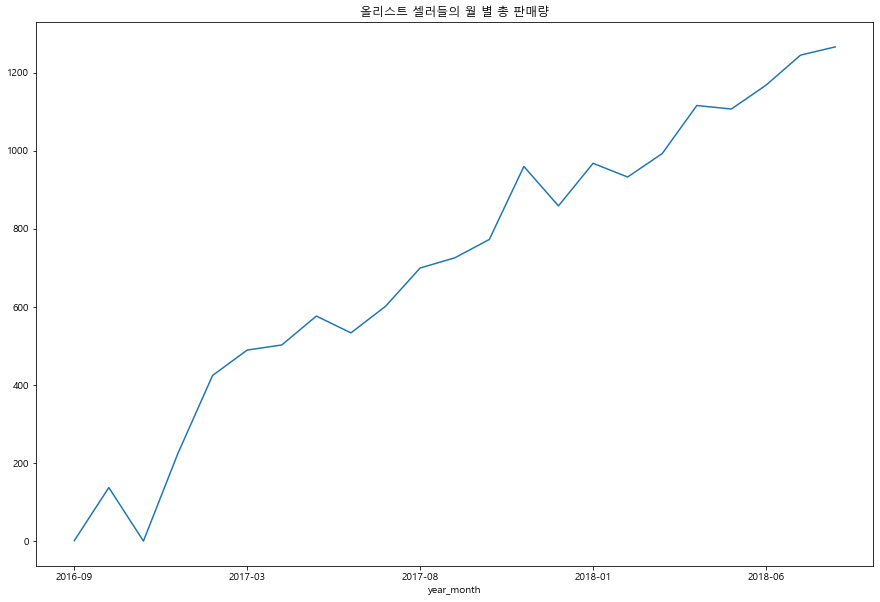

In [34]:
# 라인그래프로 시각화 
plt.figure(figsize = (15,10))
plt.title("올리스트 셀러들의 월 별 총 판매량") 
y_m.plot()
#셀러들이 월 별 판매하는 상품들의 총 합 

## 월 별, 주문건, 중복을 제외한 판매제품 종류 수, 셀러 수, 총 판매금액

In [35]:
df_valid.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,2017-10
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,2017-08
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,2017-08
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,2017-10
4,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,2017-08-24 11:31:28,2017-08-24 11:45:25,2017-08-25 14:17:55,2017-08-28 20:12:20,2017-09-14 00:00:00,2.0,be03d93320192443b8fa24c0ca6ead98,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-30 11:45:25,46.80,67.70,utilidades_domesticas,59.0,189.0,3.0,775.0,16.0,16.0,13.0,housewares,9350.0,maua,SP,2017-08


In [36]:
ym_sell = df_valid.groupby('year_month').agg({'product_category_name' : 'nunique',
                                            'seller_id' : 'nunique',
                                              'order_id' : 'nunique',
                                            'price' : ('sum','mean')}).style.format("{:,.0f}") 
ym_sell

In [37]:
# get_month_day1() 함수를 통해 " 연도-월-1 " 형식으로 만듭니다.
# 일자를 " 1 "로 통일화한 이유는 월별 잔존률을 구하기 위해서 입니다.(월 단위)
def get_month_day1(x): 
    return dt.datetime(x.year, x.month, 1)

In [38]:
df_valid['order_purchase_timestamp'].iloc[0]

Timestamp('2017-10-02 10:56:33')

In [39]:
get_month_day1(df_valid['order_purchase_timestamp'].iloc[0])

datetime.datetime(2017, 10, 1, 0, 0)

In [40]:
df_valid['해당판매월'] = df_valid['order_purchase_timestamp'].map(get_month_day1)
df_valid[['order_purchase_timestamp','해당판매월']].sample(5)

,order_purchase_timestamp,해당판매월
53929,2017-02-26 17:39:49,2017-02-01
86460,2018-05-16 15:49:50,2018-05-01
72473,2016-10-05 19:09:33,2016-10-01
101210,2017-08-11 19:18:12,2017-08-01
26501,2018-03-07 12:08:37,2018-03-01


In [41]:
# transform을 사용하여 retention 분석 하기 !!!!
df_valid.groupby("seller_id")["해당판매월"].transform("min")
# ["해당구매월"].transform("min")은 중복값 제외하고 몇월에 셀러아이디별 처음 판매가 이루어졌는지를 보는거임\
# = 이걸 첫 구매월 컬럼으로 할당 

0        2017-07-01
1        2017-07-01
2        2017-07-01
3        2017-07-01
4        2017-07-01
            ...    
113420   2018-08-01
113421   2018-07-01
113422   2018-07-01
113423   2018-07-01
113424   2018-07-01
Name: 해당판매월, Length: 112719, dtype: datetime64[ns]

In [42]:
df_valid['첫판매월'] = df_valid.groupby("seller_id")["해당판매월"].transform("min")

In [43]:
# 셀러 아이디 별 퍼쳐스 타임스탬프에 적힌 판매 년/월이 해당판매월 /    
# 첫 판매월은 셀러아이디생성된 이래로 첫 판매가 이루어진 날
df_valid[['seller_id','order_purchase_timestamp','해당판매월','첫판매월']]

,seller_id,order_purchase_timestamp,해당판매월,첫판매월
0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-02 10:56:33,2017-10-01,2017-07-01
1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-15 18:29:31,2017-08-01,2017-07-01
2,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-02 18:24:47,2017-08-01,2017-07-01
3,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-23 23:26:46,2017-10-01,2017-07-01
4,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-24 11:31:28,2017-08-01,2017-07-01
...,...,...,...,...
113420,04ee0ec01589969663ba5967c0e0bdc0,2018-08-21 11:29:05,2018-08-01,2018-08-01
113421,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-28 17:55:27,2018-07-01,2018-07-01
113422,ef728fa1f17436c91ed1ccd03dcf9631,2018-08-23 12:31:37,2018-08-01,2018-07-01
113423,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-23 18:35:14,2018-07-01,2018-07-01


### 그래서 첫 판매일자와  최근 판매일자 사이의 interval

In [44]:
# 연도별 차이( year_diff )와 월별 차이( month_diff )를 구합니다.

year_diff = df_valid["해당판매월"].dt.year - df_valid["첫판매월"].dt.year
month_diff = df_valid["해당판매월"].dt.month - df_valid["첫판매월"].dt.month

In [45]:
# 몇 달이 차이가 나는지
# " 연도차이 * 12개월 + 월차이 + 1 "로 첫 판매 후 몇달 후 구매인지 알 수 있도록 CohortIndex 변수를 생성합니다.
# 2010-12-01부터 2011-12-01의 데이터를 기반으로 진행되어 CohortIndex 변수의 최소값은 1이며, 최대값 13입니다.
# df_valid["CohortIndex"] == df_valid["몇달째구매"]
df_valid["몇달째판매"]  = ( year_diff * 12) + month_diff + 1 #12달이니까 ~! 
df_valid["몇달째판매"]

0         4.0
1         2.0
2         2.0
3         4.0
4         2.0
         ... 
113420    1.0
113421    1.0
113422    2.0
113423    1.0
113424    1.0
Name: 몇달째판매, Length: 112719, dtype: float64

In [46]:
df_valid["몇달째판매"].unique()

array([ 4.,  2.,  3.,  5.,  1.,  6.,  8.,  7., 14., 10., 12., 13., 11.,
        9., 17., 16., 19., 15., 20., 18., 21., 23., 22., 24., nan])

In [47]:
# CohortIndex 값으로 월별 잔존 판매에 대한 빈도수를 구합니다.
# 셀러등록 후 월별 판매 빈도수ㅠ를 value_counts 로 구합니다.
df_valid["몇달째판매"].value_counts().sort_index()


1.0     7893
2.0     8476
3.0     8291
4.0     8759
5.0     8867
6.0     7768
7.0     7720
8.0     7243
9.0     6638
10.0    6332
11.0    6203
12.0    4722
13.0    4302
14.0    4187
15.0    3517
16.0    2923
17.0    2631
18.0    2250
19.0    1622
20.0     772
21.0     319
22.0     327
23.0     332
24.0      14
Name: 몇달째판매, dtype: int64

## RETENTION GRAPH 그리기

In [48]:
seller_retention = df_valid["몇달째판매"].value_counts().sort_index().to_frame()
seller_retention = seller_retention.reset_index()
seller_retention.columns = ['month', 'cnt']
seller_retention

,month,cnt
0,1.0,7893
1,2.0,8476
2,3.0,8291
3,4.0,8759
4,5.0,8867
5,6.0,7768
6,7.0,7720
7,8.0,7243
8,9.0,6638
9,10.0,6332


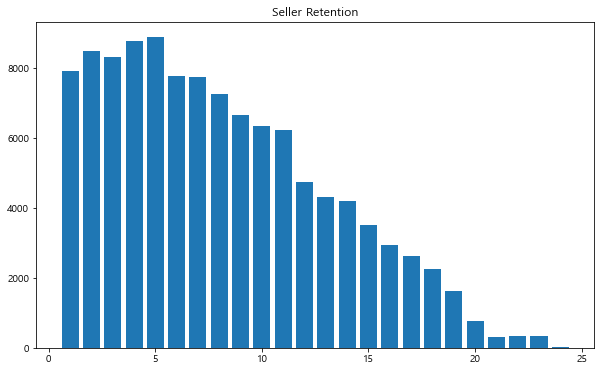

In [49]:
plt.figure(figsize = (10,6))
plt.bar(seller_retention['month'], seller_retention['cnt'])
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('Seller Retention')
plt.show()

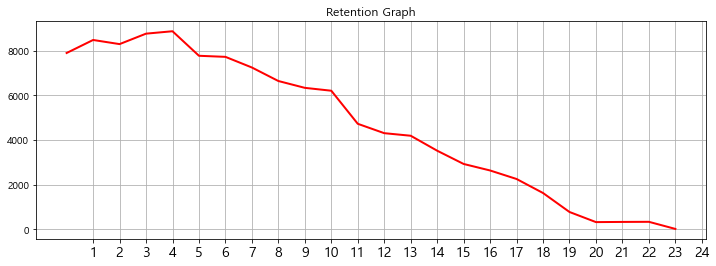

In [50]:
plt.figure(figsize=(12, 4))
seller_retention['cnt'].plot(grid = True, linewidth=2, color = 'r')
plt.title('Retention Graph')
plt.xticks(seller_retention['month'], fontsize=14)

plt.show()

## 코호트 분석 시각화 - 첫 판매 이후 월 별 재판매한 셀러의 수 

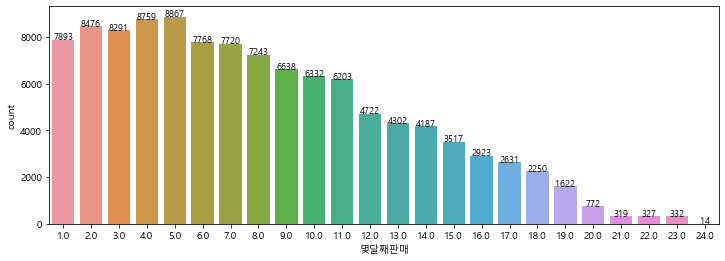

In [51]:
# 첫 판매 이후 월 별 재판매횟수 알고 싶으면... 
plt.figure(figsize=(12, 4))
total = len(df_valid) 
ax = sns.countplot(data = df_valid, x = '몇달째판매') 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
  #첫 판매한 월 로부터 2번째 판매가 이루어진 월이 24개월 이후 인 셀러의 수는 14명 이라는 뜻임 

## 잔존빈도 구하기 

In [52]:
cohort_count = df_valid.groupby(['첫판매월', '몇달째판매'])['seller_id'].nunique().unstack()
cohort_count

몇달째판매,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
첫판매월,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01,2.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2016-10-01,136.0,NaN,NaN,72.0,86.0,77.0,72.0,76.0,67.0,70.0,67.0,63.0,63.0,64.0,63.0,60.0,57.0,53.0,49.0,43.0,43.0,43.0,44.0,NaN
2016-12-01,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,152.0,108.0,106.0,91.0,98.0,89.0,76.0,86.0,78.0,81.0,77.0,63.0,70.0,64.0,69.0,66.0,55.0,55.0,50.0,56.0,NaN,NaN,NaN,NaN
2017-02-01,230.0,138.0,124.0,125.0,102.0,112.0,111.0,98.0,95.0,94.0,98.0,84.0,83.0,83.0,89.0,70.0,72.0,66.0,58.0,NaN,NaN,NaN,NaN,NaN
2017-03-01,168.0,99.0,93.0,85.0,79.0,82.0,75.0,70.0,83.0,63.0,68.0,56.0,58.0,52.0,50.0,51.0,43.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,116.0,63.0,53.0,58.0,56.0,51.0,43.0,53.0,44.0,44.0,36.0,39.0,35.0,33.0,28.0,32.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,121.0,62.0,61.0,63.0,58.0,53.0,54.0,46.0,49.0,50.0,44.0,39.0,34.0,28.0,33.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,75.0,31.0,30.0,36.0,24.0,28.0,28.0,25.0,20.0,22.0,21.0,18.0,16.0,17.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
cohort_count.fillna(0)

몇달째판매,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
첫판매월,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2016-10-01,136.0,0.0,0.0,72.0,86.0,77.0,72.0,76.0,67.0,70.0,67.0,63.0,63.0,64.0,63.0,60.0,57.0,53.0,49.0,43.0,43.0,43.0,44.0,0.0
2016-12-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01,152.0,108.0,106.0,91.0,98.0,89.0,76.0,86.0,78.0,81.0,77.0,63.0,70.0,64.0,69.0,66.0,55.0,55.0,50.0,56.0,0.0,0.0,0.0,0.0
2017-02-01,230.0,138.0,124.0,125.0,102.0,112.0,111.0,98.0,95.0,94.0,98.0,84.0,83.0,83.0,89.0,70.0,72.0,66.0,58.0,0.0,0.0,0.0,0.0,0.0
2017-03-01,168.0,99.0,93.0,85.0,79.0,82.0,75.0,70.0,83.0,63.0,68.0,56.0,58.0,52.0,50.0,51.0,43.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-01,116.0,63.0,53.0,58.0,56.0,51.0,43.0,53.0,44.0,44.0,36.0,39.0,35.0,33.0,28.0,32.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-01,121.0,62.0,61.0,63.0,58.0,53.0,54.0,46.0,49.0,50.0,44.0,39.0,34.0,28.0,33.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-01,75.0,31.0,30.0,36.0,24.0,28.0,28.0,25.0,20.0,22.0,21.0,18.0,16.0,17.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
cohort_count.index = cohort_count.index.astype(str)
# 날짜를 문자로 바꿔줌 !~~~ 

<AxesSubplot:xlabel='몇달째판매', ylabel='첫판매월'>

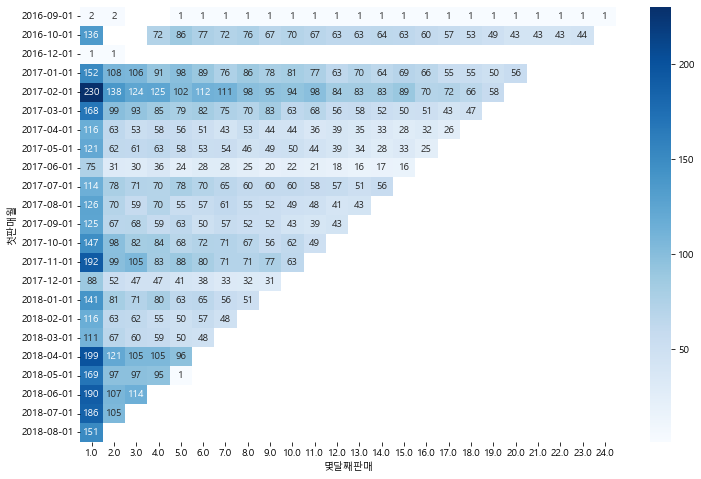

In [55]:
# 매트릭스는 히트맵으로 시각화 해주는 것이 효과적임
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_count, annot = True, 
            cmap = 'Blues', fmt = '.0f')

### 위 히트맵이 의미하는건 : 

## 월별 신규 셀러 유입수

In [56]:
# 히트맵 1번컬럼 !  왜? 신규셀러이면서 첫판매니까 
cohort_count[1]

첫판매월
2016-09-01      2.0
2016-10-01    136.0
2016-12-01      1.0
2017-01-01    152.0
2017-02-01    230.0
2017-03-01    168.0
2017-04-01    116.0
2017-05-01    121.0
2017-06-01     75.0
2017-07-01    114.0
2017-08-01    126.0
2017-09-01    125.0
2017-10-01    147.0
2017-11-01    192.0
2017-12-01     88.0
2018-01-01    141.0
2018-02-01    116.0
2018-03-01    111.0
2018-04-01    199.0
2018-05-01    169.0
2018-06-01    190.0
2018-07-01    186.0
2018-08-01    151.0
Name: 1.0, dtype: float64

### 월별 신규 셀러 유입 수 시각화

<AxesSubplot:ylabel='첫판매월'>

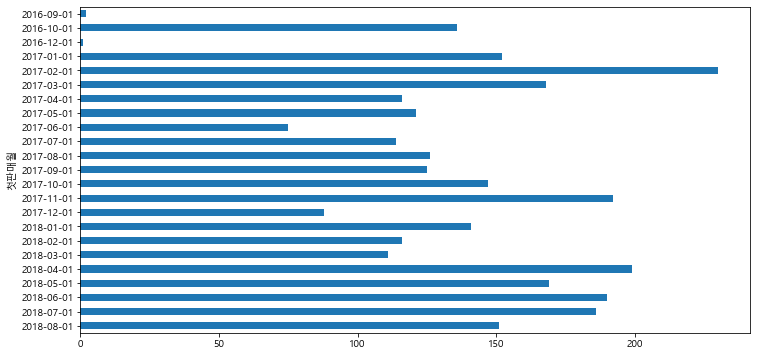

In [57]:
cohort_count[1].sort_index(ascending = False).plot.barh(figsize=(12, 6))

### 시각화 자료가 의미하는건 ,,,  

## 잔존율 구하기

In [58]:
# 가입한 달을 1로 나누면 잔존률을 구할 수 있음 => div !!!!
# div 를 통해 구하며 axis=0 으로 설정하면 첫 달을 기준으로 나머지 달을 나누게 됨
cohort_ratio = cohort_count.div(cohort_count[1], axis=0) * 100
cohort_ratio.round(2)

몇달째판매,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
첫판매월,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01,100.0,100.00,NaN,NaN,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.0
2016-10-01,100.0,NaN,NaN,52.94,63.24,56.62,52.94,55.88,49.26,51.47,49.26,46.32,46.32,47.06,46.32,44.12,41.91,38.97,36.03,31.62,31.62,31.62,32.35,NaN
2016-12-01,100.0,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,100.0,71.05,69.74,59.87,64.47,58.55,50.00,56.58,51.32,53.29,50.66,41.45,46.05,42.11,45.39,43.42,36.18,36.18,32.89,36.84,NaN,NaN,NaN,NaN
2017-02-01,100.0,60.00,53.91,54.35,44.35,48.70,48.26,42.61,41.30,40.87,42.61,36.52,36.09,36.09,38.70,30.43,31.30,28.70,25.22,NaN,NaN,NaN,NaN,NaN
2017-03-01,100.0,58.93,55.36,50.60,47.02,48.81,44.64,41.67,49.40,37.50,40.48,33.33,34.52,30.95,29.76,30.36,25.60,27.98,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,100.0,54.31,45.69,50.00,48.28,43.97,37.07,45.69,37.93,37.93,31.03,33.62,30.17,28.45,24.14,27.59,22.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,100.0,51.24,50.41,52.07,47.93,43.80,44.63,38.02,40.50,41.32,36.36,32.23,28.10,23.14,27.27,20.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,100.0,41.33,40.00,48.00,32.00,37.33,37.33,33.33,26.67,29.33,28.00,24.00,21.33,22.67,21.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 잔존율 시각화 

<AxesSubplot:xlabel='몇달째판매', ylabel='첫판매월'>

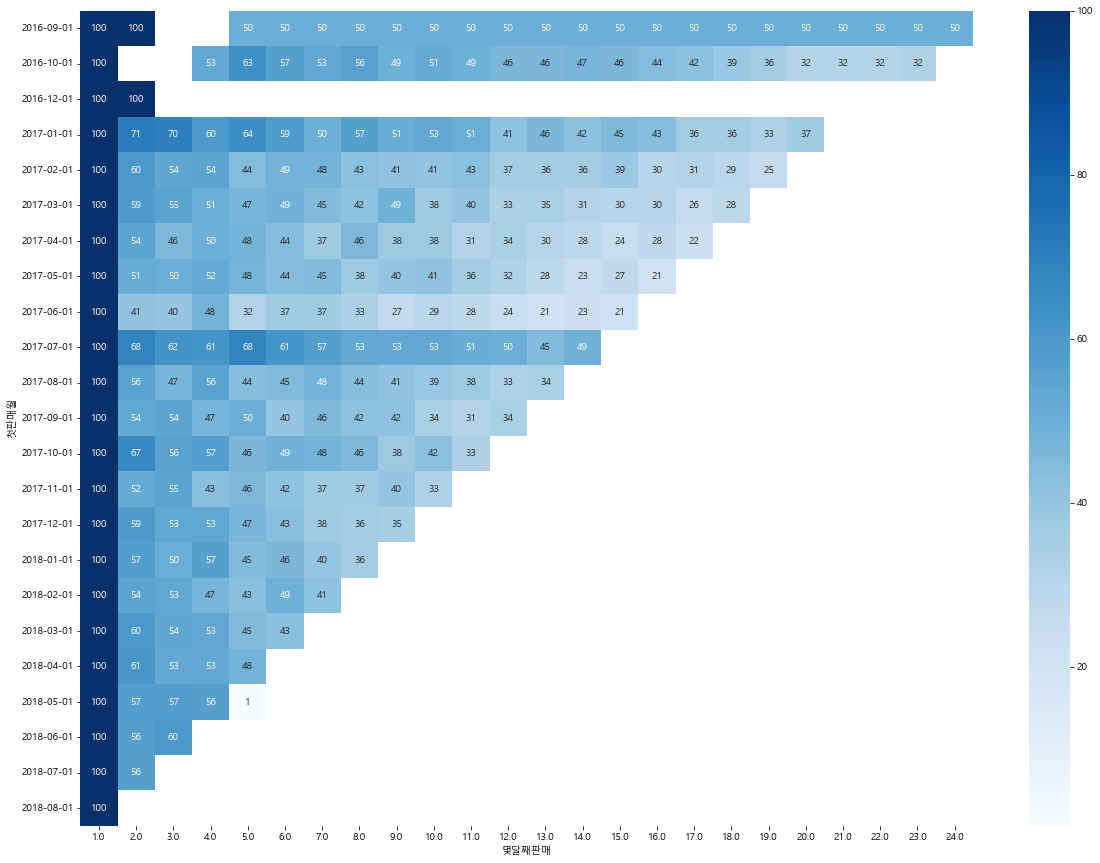

In [59]:
# 가입한 달을 1로 나누면 잔존률을 구할 수 있음 => div !!!!
# div 를 통해 구하며 axis=0 으로 설정하면 첫 달을 기준으로 나머지 달을 나누게 됨
cohort_ratio = cohort_count.div(cohort_count[1], axis=0) * 100
plt.figure(figsize=(20, 15))
sns.heatmap(data = cohort_ratio, annot = True,
           cmap = 'Blues',fmt = '.0f')

### - 히트맵 분석이 의미하는건 - 잔존율 굳굳굳

https://velog.io/@wltn39/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%9C%EA%B0%81%ED%99%94-Dual-Axis

# 리텐션 수치

In [61]:
retention = df_valid.groupby(["첫판매월", "몇달째판매"])["seller_id"].nunique().unstack()

In [62]:
retention = retention.reset_index().fillna(0)
retention

몇달째판매,첫판매월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
0,2016-09-01,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2016-10-01,136.0,0.0,0.0,72.0,86.0,77.0,72.0,76.0,67.0,70.0,67.0,63.0,63.0,64.0,63.0,60.0,57.0,53.0,49.0,43.0,43.0,43.0,44.0,0.0
2,2016-12-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01,152.0,108.0,106.0,91.0,98.0,89.0,76.0,86.0,78.0,81.0,77.0,63.0,70.0,64.0,69.0,66.0,55.0,55.0,50.0,56.0,0.0,0.0,0.0,0.0
4,2017-02-01,230.0,138.0,124.0,125.0,102.0,112.0,111.0,98.0,95.0,94.0,98.0,84.0,83.0,83.0,89.0,70.0,72.0,66.0,58.0,0.0,0.0,0.0,0.0,0.0
5,2017-03-01,168.0,99.0,93.0,85.0,79.0,82.0,75.0,70.0,83.0,63.0,68.0,56.0,58.0,52.0,50.0,51.0,43.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2017-04-01,116.0,63.0,53.0,58.0,56.0,51.0,43.0,53.0,44.0,44.0,36.0,39.0,35.0,33.0,28.0,32.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2017-05-01,121.0,62.0,61.0,63.0,58.0,53.0,54.0,46.0,49.0,50.0,44.0,39.0,34.0,28.0,33.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2017-06-01,75.0,31.0,30.0,36.0,24.0,28.0,28.0,25.0,20.0,22.0,21.0,18.0,16.0,17.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2017-07-01,114.0,78.0,71.0,70.0,78.0,70.0,65.0,60.0,60.0,60.0,58.0,57.0,51.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
len(retention.columns)

25

In [64]:
retention.columns[0]

'첫판매월'

In [65]:
retention.columns[1]

1.0

In [66]:
retention[1]

0       2.0
1     136.0
2       1.0
3     152.0
4     230.0
5     168.0
6     116.0
7     121.0
8      75.0
9     114.0
10    126.0
11    125.0
12    147.0
13    192.0
14     88.0
15    141.0
16    116.0
17    111.0
18    199.0
19    169.0
20    190.0
21    186.0
22    151.0
Name: 1.0, dtype: float64

In [67]:
retention[1].sum()

3056.0

In [68]:
real_retention = []
for i in range(1, 25):
    print(i,retention[i].sum()) 
    real_retention.append(int(retention[i].sum()))

1 3056.0
2 1609.0
3 1408.0
4 1337.0
5 1157.0
6 1030.0
7 922.0
8 843.0
9 765.0
10 702.0
11 606.0
12 504.0
13 454.0
14 398.0
15 349.0
16 305.0
17 254.0
18 222.0
19 158.0
20 100.0
21 44.0
22 44.0
23 45.0
24 1.0


In [69]:
real_retention_df = pd.DataFrame(real_retention)
real_retention_df.index = list(range(1,25))
real_retention_df.columns = ['retention']
real_retention_df

,retention
1,3056
2,1609
3,1408
4,1337
5,1157
6,1030
7,922
8,843
9,765
10,702


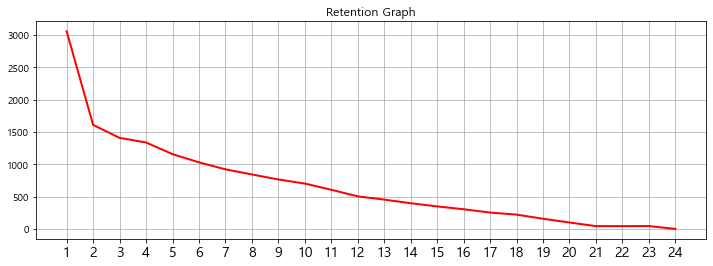

In [70]:
plt.figure(figsize=(12, 4))
real_retention_df['retention'].plot(grid = True, linewidth=2, color = 'r')
plt.title('Retention Graph')
plt.xticks(real_retention_df.index, fontsize=14)

plt.show()

# real_retention_df.plot()


# 리텐션 비율

In [71]:
cohort_ratio = cohort_ratio.reset_index()

In [72]:
cohort_ratio 

몇달째판매,첫판매월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
0,2016-09-01,100.0,100.000000,NaN,NaN,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
1,2016-10-01,100.0,NaN,NaN,52.941176,63.235294,56.617647,52.941176,55.882353,49.264706,51.470588,49.264706,46.323529,46.323529,47.058824,46.323529,44.117647,41.911765,38.970588,36.029412,31.617647,31.617647,31.617647,32.352941,NaN
2,2016-12-01,100.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01,100.0,71.052632,69.736842,59.868421,64.473684,58.552632,50.000000,56.578947,51.315789,53.289474,50.657895,41.447368,46.052632,42.105263,45.394737,43.421053,36.184211,36.184211,32.894737,36.842105,NaN,NaN,NaN,NaN
4,2017-02-01,100.0,60.000000,53.913043,54.347826,44.347826,48.695652,48.260870,42.608696,41.304348,40.869565,42.608696,36.521739,36.086957,36.086957,38.695652,30.434783,31.304348,28.695652,25.217391,NaN,NaN,NaN,NaN,NaN
5,2017-03-01,100.0,58.928571,55.357143,50.595238,47.023810,48.809524,44.642857,41.666667,49.404762,37.500000,40.476190,33.333333,34.523810,30.952381,29.761905,30.357143,25.595238,27.976190,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-04-01,100.0,54.310345,45.689655,50.000000,48.275862,43.965517,37.068966,45.689655,37.931034,37.931034,31.034483,33.620690,30.172414,28.448276,24.137931,27.586207,22.413793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017-05-01,100.0,51.239669,50.413223,52.066116,47.933884,43.801653,44.628099,38.016529,40.495868,41.322314,36.363636,32.231405,28.099174,23.140496,27.272727,20.661157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-06-01,100.0,41.333333,40.000000,48.000000,32.000000,37.333333,37.333333,33.333333,26.666667,29.333333,28.000000,24.000000,21.333333,22.666667,21.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2017-07-01,100.0,68.421053,62.280702,61.403509,68.421053,61.403509,57.017544,52.631579,52.631579,52.631579,50.877193,50.000000,44.736842,49.122807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
total_retention = []
for i in range(1, 25):
    print(i,round(cohort_ratio[i].mean())) 
    total_retention.append(round(cohort_ratio[i].mean()))

1 100
2 62
3 54
4 53
5 46
6 47
7 45
8 44
9 43
10 42
11 40
12 38
13 37
14 37
15 35
16 35
17 35
18 36
19 36
20 39
21 41
22 41
23 41
24 50


<AxesSubplot:>

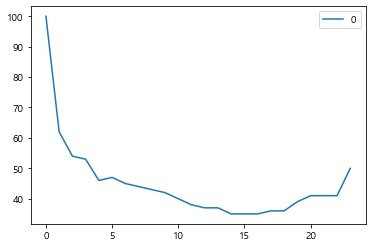

In [74]:
pd.DataFrame(total_retention).plot()

In [75]:
total_retention = pd.DataFrame(total_retention)
total_retention.index = list(range(1,25))
total_retention.columns = ['retention']
total_retention

,retention
1,100
2,62
3,54
4,53
5,46
6,47
7,45
8,44
9,43
10,42


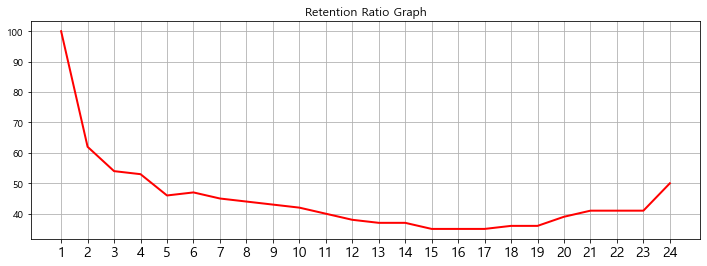

In [76]:
plt.figure(figsize=(12, 4))
total_retention['retention'].plot(grid = True, linewidth=2, color = 'r')
plt.title('Retention Ratio Graph')
plt.xticks(total_retention.index, fontsize=14)

plt.show()